### Objective

Establish baseline behavioral and psychological patterns using univariate analysis.
No risk labeling or causal assumptions are made at this stage.

In [84]:
import os
import sys

sys.path.append(os.path.abspath(".."))

In [86]:
from src.data_utils import load_raw, save_processed
import matplotlib.pyplot as plt
import pandas as pd

df=load_raw("email.csv")
df1=load_raw("psychometric.csv")

### 1. Emails per User

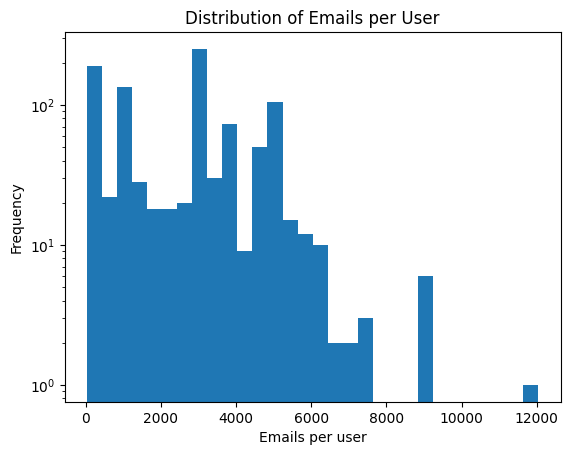

In [87]:
email_per_user=df.groupby('user').size()

plt.hist(email_per_user, bins=30, log=True)
plt.xlabel("Emails per user")
plt.ylabel("Frequency")
plt.title("Distribution of Emails per User")
plt.show()

### Observation

- Distribution is strongly right-skewed

- Majority of users have low email activity

- Small subset of users has very high activity

### Interpretation

This reflects role-based differences in communication responsibilities and is typical
of enterprise environments.

### 2. Email Size Distribution

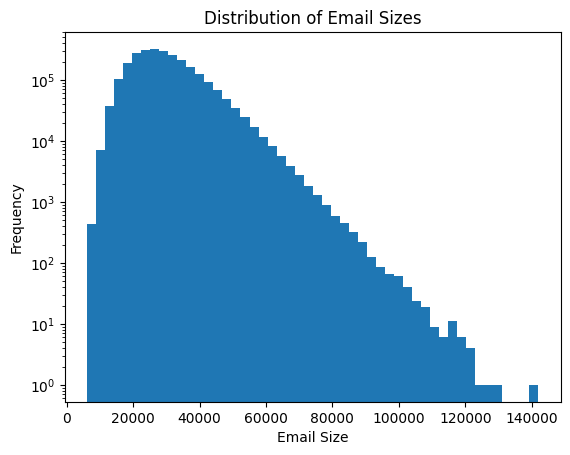

In [88]:
plt.hist(df['size'], bins=50, log=True)
plt.xlabel("Email Size")
plt.ylabel("Frequency")
plt.title("Distribution of Email Sizes")
plt.show()

### Observation

- Email sizes show a heavy right tail

- Most emails are small to medium-sized

- Rare but extremely large emails exist

### Interpretation

Large emails may represent attachments or bulk transfers. Size alone does not imply
risk but provides useful behavioral context.

### 3. Attachment Usage per User

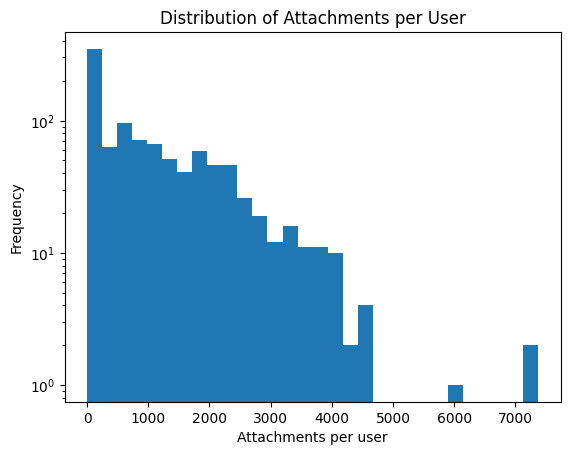

In [89]:
attachments_per_user = df.groupby('user')['attachments'].sum()

plt.hist(attachments_per_user, bins=30, log=True)
plt.xlabel("Attachments per user")
plt.ylabel("Frequency")
plt.title("Distribution of Attachments per User")
plt.show()


### Observation

- Most users have minimal attachment activity

- A few users account for high attachment volumes

### Interpretation

Attachment usage is role-dependent. Extreme usage may warrant contextual review in later stages.

### 4. CC and BCC Usage Patterns

In [90]:
df['cc_used']=df['cc'].fillna('').ne('').astype(int)
df['bcc_used']=df['bcc'].fillna('').ne('').astype(int)

cc_bcc_usage=df.groupby('user')[['cc_used','bcc_used']].sum()
cc_bcc_usage.head()

,cc_used,bcc_used
user,,
AAE0190,1237,0
AAF0535,327,238
AAF0791,810,0
AAL0706,100,0
AAM0658,191,0


### Observation

- CC usage is more common than BCC usage

- BCC usage is rare for most users

### Interpretation

These patterns describe communication style and structure, not intent.

### 5. Psychometric Score Distributions (O, C, E, A, N)

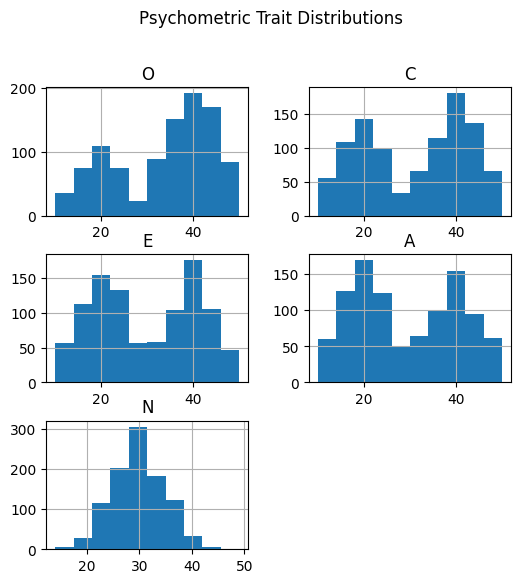

In [99]:
df1[['O','C', 'E', 'A', 'N']].hist(bins=10, figsize=(6,6))

plt.suptitle("Psychometric Trait Distributions", y=1.01)
plt.show()

### Observation

- All traits show reasonable spread

- No extreme skewness or invalid values

- Neuroticism is more centrally concentrated

### Interpretation

Psychometric traits provide background context and are not treated as risk indicators in isolation.